## Aim: To get familiar with OpenCV operations
### Note: Use matplotlib or OpenCV to display images and write the code after the #Answer comment
### Grade points = 20%
### Please submit the notebook as the submission and make sure output for each cell is displayed and all cells are executed

## Important Note: Please submit your original work and don't share your work with others

##    Name: Andrea Percy Francis
##    Student id: 200555646







In [1]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

### Question 1

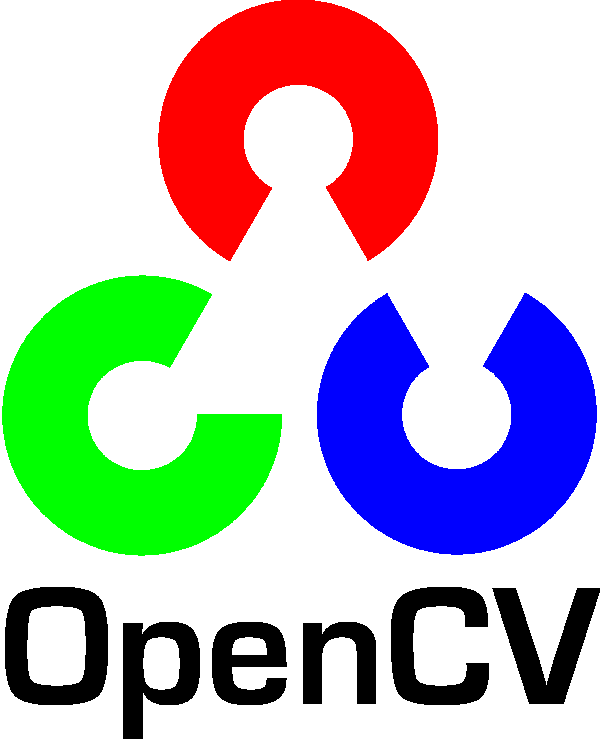


The shape of the image is: (739, 600, 3)

The image height is:  739
The image width is:  600
The Number of Channels is:  3


In [4]:
#read image opencv-logo
#display shape and size of the image
reading_image = cv2.imread('/opencv-logo.png',cv2.IMREAD_COLOR)
cv2_imshow(reading_image)
shape=reading_image.shape
print("\nThe shape of the image is:", shape)
height = reading_image.shape[0]
width = reading_image.shape[1]
channels = reading_image.shape[2]

print('\nThe image height is: ',height)
print('The image width is: ',width)
print('The Number of Channels is: ',channels)


### Question 2

The black image is displayed below:


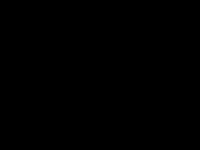

The white image is displayed below:


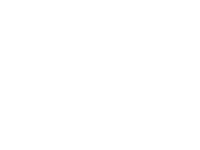

In [5]:
#create a numpy array of zeroes that is 150 pixels tall, 200 pixels wide
#display this black image

#Similarly create a numpy array on ones with above dimensions and display the white image

print("The black image is displayed below:")
black_img=np.zeros((150,200),dtype=np.int32)
cv2_imshow(black_img)

print("The white image is displayed below:")
white_img=np.ones((150,200))*255
cv2_imshow(white_img)

Please note that the white image has gotten camouflaged with the background

### Question 3

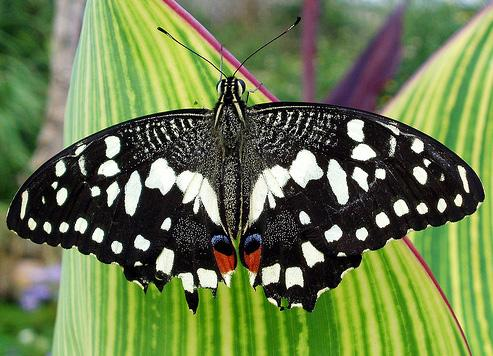

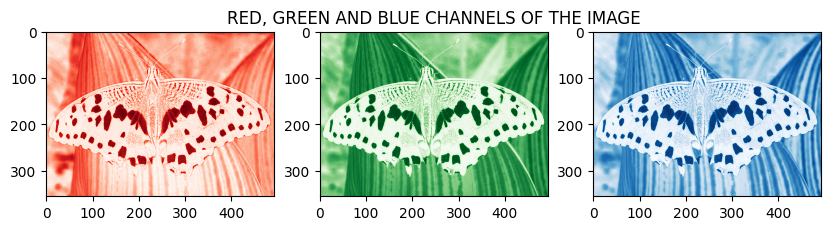

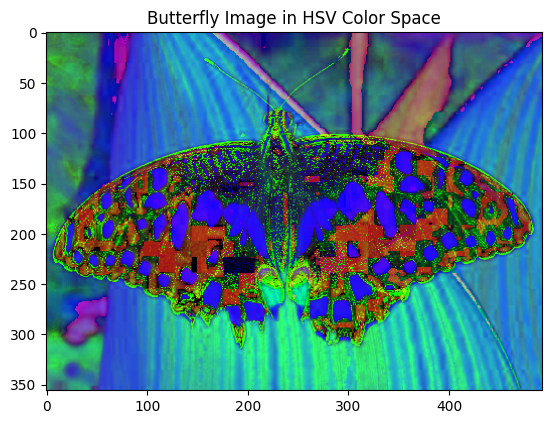

In [6]:
#read the butterfly image and display the r,g,b channels of the image
#Then display the butterfly image in the HSV color space
butterfly=cv2.imread("/butterfly.jpg",cv2.IMREAD_COLOR)
cv2_imshow(butterfly)
r, g, b = cv2.split(butterfly)

fig, axs = plt.subplots(1, 3,figsize=(10,10))

axs[1].set_title("RED, GREEN AND BLUE CHANNELS OF THE IMAGE")
axs[0].imshow(r, cmap='Reds')
axs[1].imshow(g, cmap='Greens')
axs[2].imshow(b, cmap='Blues')

plt.show()
hsv_butterfly = cv2.cvtColor(butterfly, cv2.COLOR_BGR2HSV)
plt.imshow(hsv_butterfly)
plt.title('Butterfly Image in HSV Color Space')
plt.show()

### Question 4

Array of random numbers:
[[44 47 64 67 67]
 [ 9 83 21 36 87]
 [70 88 88 12 58]
 [65 39 87 46 88]
 [81 37 25 77 72]]
Largest value: 88
Smallest value: 9


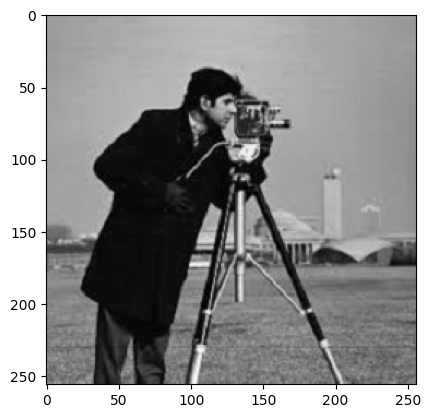

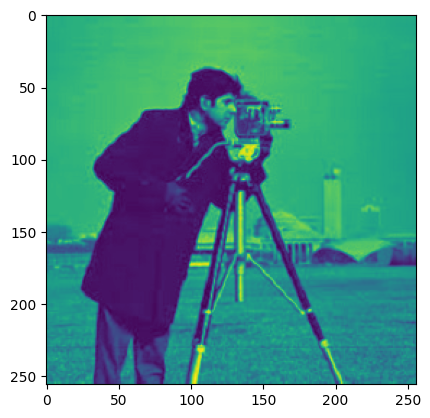

In [7]:
#create a 5 by 5 array where every number is a 10
#run the cell below to create an array of random numbers and see if you can figure out how it works.
#what are the largest and smalled values in this array?
#use PIL and matplotlib to read and display the any image of your choice from the given images.
#convert the image to a NumPy Array
#use slicing to set the RED and GREEN channels of the picture to 0, then use imshow() to show the isolated blue channel

from PIL import Image
ten_array=np.full((5,5),10)
np.random.seed(0)
arr2 = np.random.randint(0, 100, size=(5, 5))
print('Array of random numbers:')
print(arr2)
print('Largest value:', np.max(arr2))
print('Smallest value:', np.min(arr2))
imga = Image.open('/cameraman.jpg')
plt.imshow(imga)
plt.show()
img_arr = np.array(imga)
img_arr[:, :, 0] = 0
img_arr[:, :, 1] = 0
plt.imshow(img_arr[:, :, 2])
plt.show()

### Question 5

The original


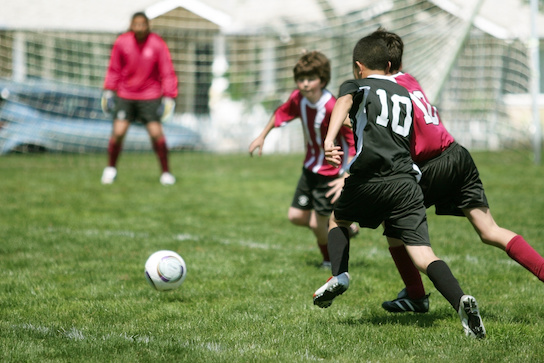


The image is halved


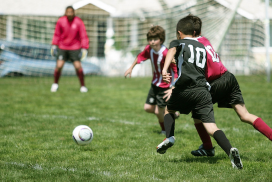


The image is stretched without interpolation


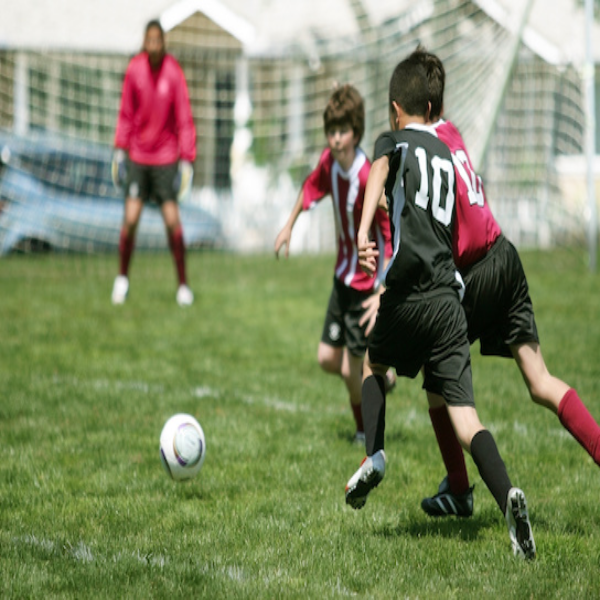


The image is stretched with interpolation


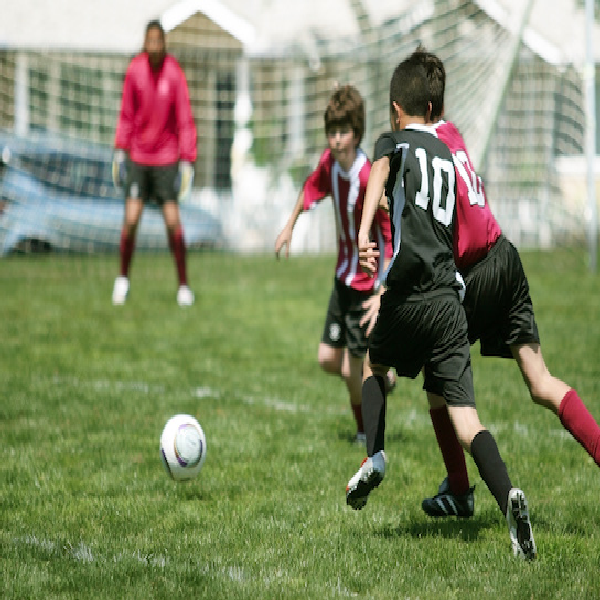

In [9]:
#read in the players image
#Perform scaling using resize method
#a) half the image using dim=(0,0), fx=0.5, fy=0.5
#b) stretch the image to dim = (600,600)
#c) stretch the image to dim = (600,600 using interpolation=cv2.INTER_NEAREST

pic_players=cv2.imread("/players.jpg",cv2.IMREAD_COLOR)
print("The original")
cv2_imshow(pic_players)
#Now scaling is attempted
#a) The image is being halved
print("\nThe image is halved")
halved=cv2.resize(pic_players,(0,0),fx=0.5,fy=0.5)
cv2_imshow(halved)
#b)& c) the image is being stretched
print("\nThe image is stretched without interpolation")
streched_wo_intro=cv2.resize(pic_players,(600,600))
cv2_imshow(streched_wo_intro)
print("\nThe image is stretched with interpolation")
stretched_with=cv2.resize(pic_players,(600,600), interpolation=cv2.INTER_NEAREST)
cv2_imshow(stretched_with)


### Question 6

The original


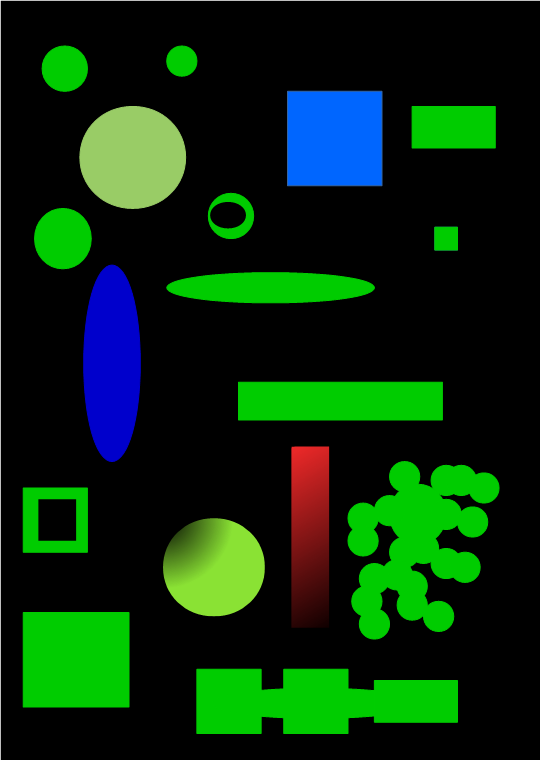


Rectangle box around the solid blue square



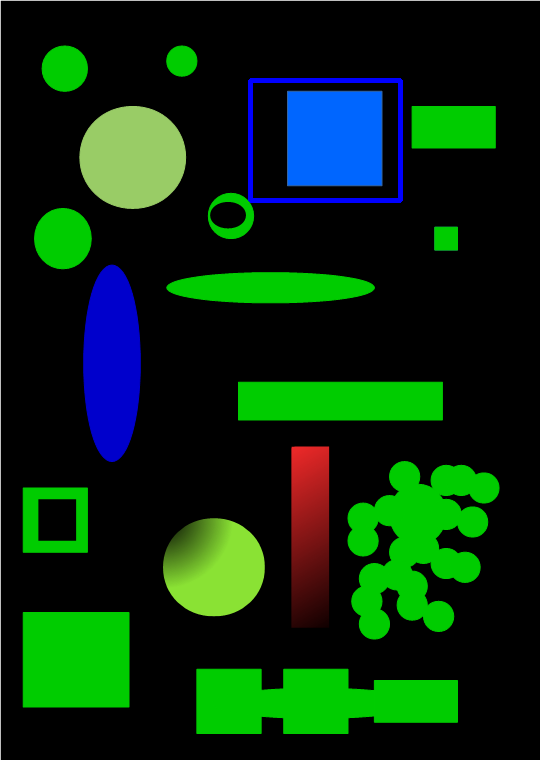


Rotated to 45degree and cropped



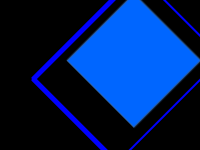

In [10]:
#read in the detect_blob image
#then draw a box shape around the blue solid box in the image that is your region of interest
#crop your region of interest
#and then rotate it 45 degrees so that it is not clipped

detect_blob_img = cv2.imread('/detect_blob.png')
print("The original")
cv2_imshow(detect_blob_img)

print("\nRectangle box around the solid blue square\n")
a=cv2.rectangle(detect_blob_img, (250, 80), (400, 200), (255, 0, 0),3)
cv2_imshow(a)
#cropping the region
cropped_roi = a[50:200, 200:400]
print("\nRotated to 45degree and cropped\n")
# rotate it 45 degrees so that it is not clipped
(rows, cols) = cropped_roi.shape[:2]
M = cv2.getRotationMatrix2D((cols/2, rows/2), 45,1)
rotated_roi = cv2.warpAffine(cropped_roi, M, (cols, rows))
cv2_imshow(rotated_roi)


### Question 7

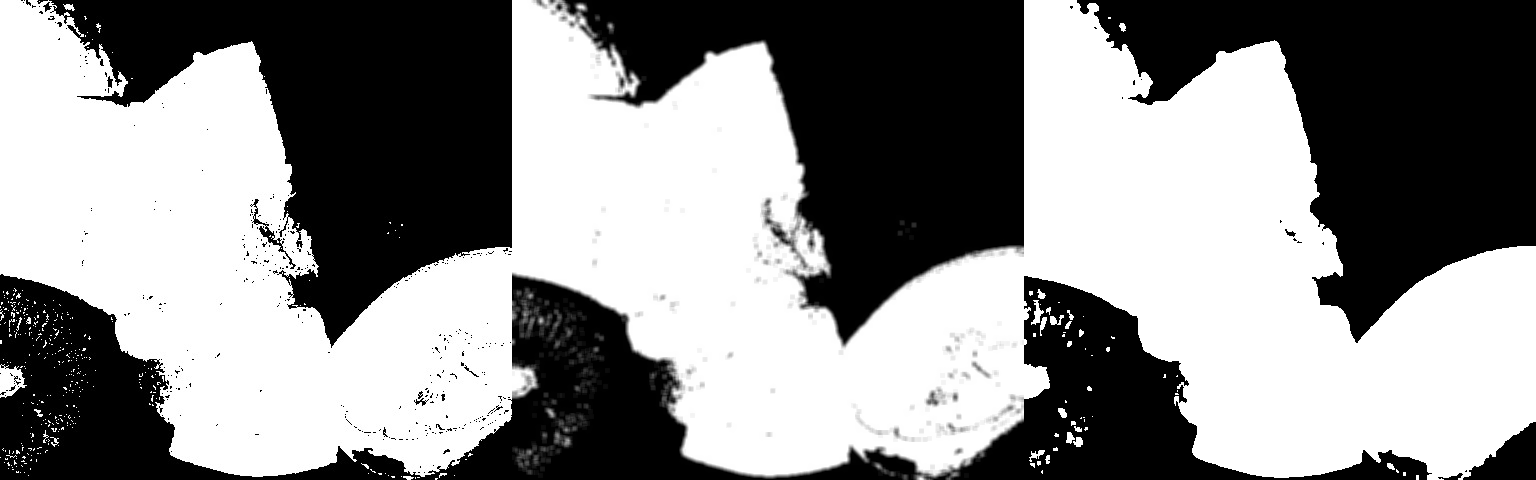


Performing Dilation



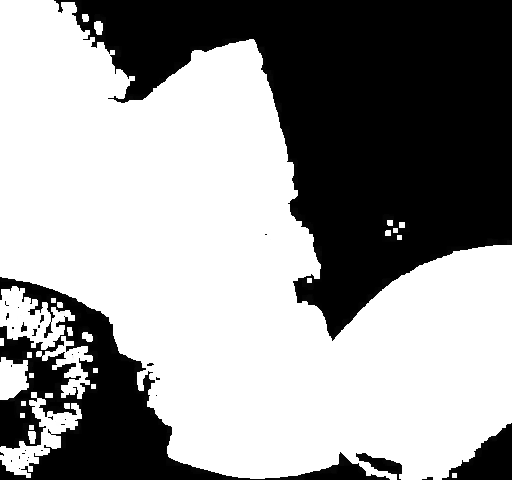


Performing Erosion



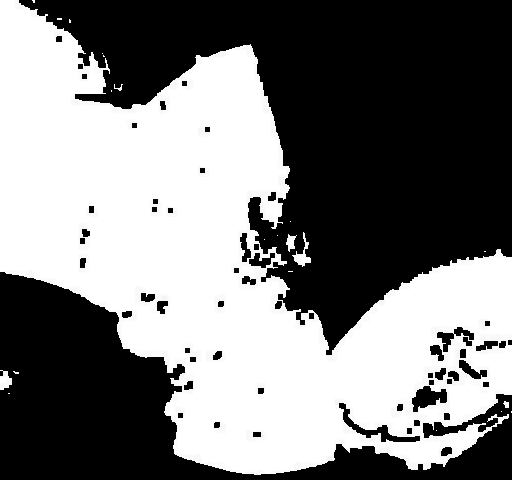


Performing Open



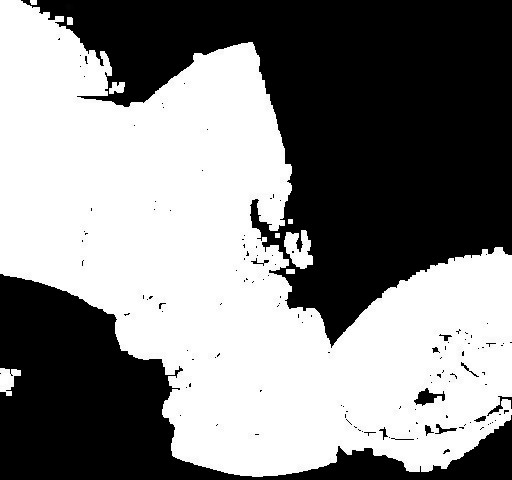


Performing Close



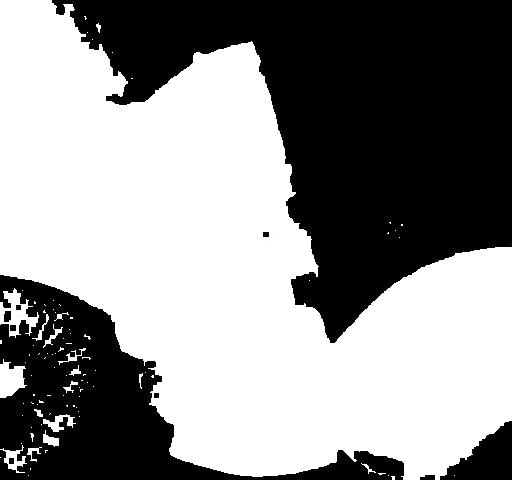


Ege detection


Ege detection: Wide



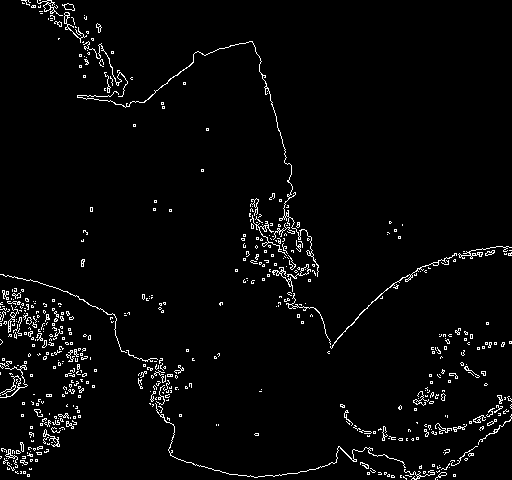


Ege detection: Narrow



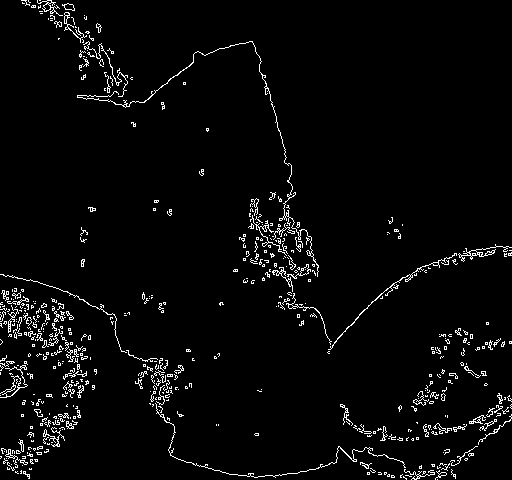

In [19]:
#read in the thresh image, perform thresholding by using gaussian blur with thresholds 5,55
#then perform dilation, erosion, opening & closing using a 5x5 kernel with 1 iteration on the original thresh image (Hint: look into Opencv for operations)
#Finally apply canny edge detection - experiment using wide and narrow thresholds
#(so just 2 images in total one wide and one narrow)

thresh_img=cv2.imread('/thresh.jpg')
dst = cv2.GaussianBlur(thresh_img,(5,5),cv2.BORDER_DEFAULT)
thresholded = cv2.threshold(dst, 55, 255, cv2.THRESH_BINARY)[1]
cv2_imshow(np.hstack((thresh_img,dst,thresholded)))
#2) performing dilation, erosion, opening & closing using a 5x5 kernel
print("\nPerforming Dilation\n")
kernel=np.ones((5,5),np.uint8)
dilated=cv2.dilate(thresh_img,kernel,iterations=1)
cv2_imshow(dilated)
print('\nPerforming Erosion\n')
erosion=cv2.erode(thresh_img,kernel,iterations=1)
cv2_imshow(erosion)
print('\nPerforming Open\n')
open=cv2.morphologyEx(thresh_img,cv2.MORPH_OPEN,kernel,iterations=1)
cv2_imshow(open)
print('\nPerforming Close\n')
close=cv2.morphologyEx(thresh_img,cv2.MORPH_CLOSE,kernel,iterations=1)
cv2_imshow(close)
print("\nEge detection\n")
edges = cv2.Canny(thresh_img,100,200)
print("\nEge detection: Wide\n")
wide_edges = cv2.Canny(thresh_img, 50, 150)
cv2_imshow(wide_edges)
print("\nEge detection: Narrow\n")
narrow_edges = cv2.Canny(thresh_img, 10, 50)
cv2_imshow(narrow_edges)

### Question 8

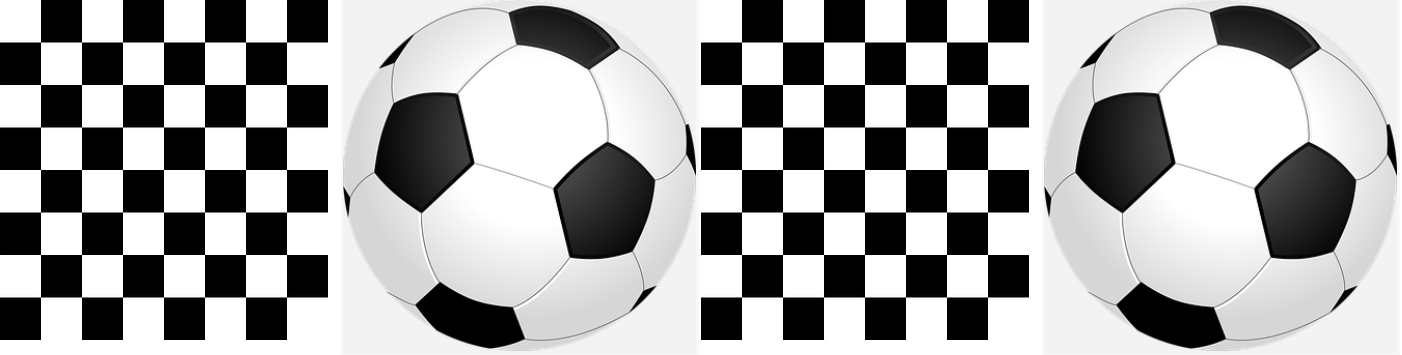

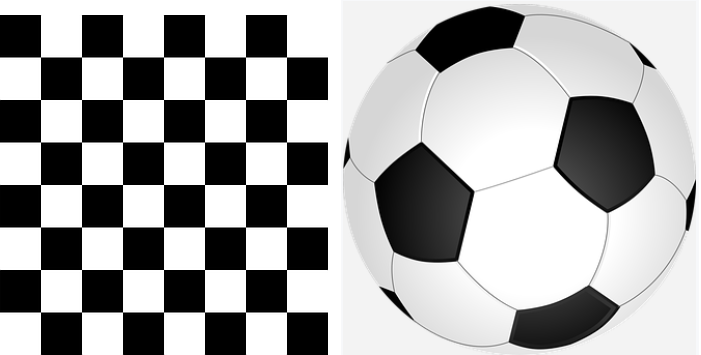

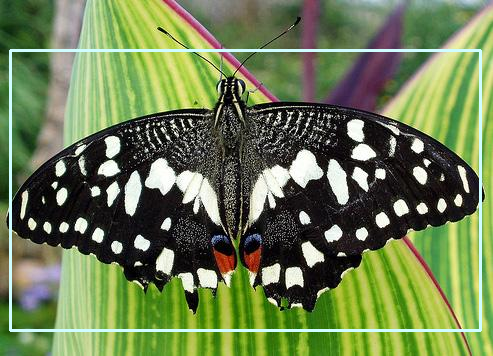

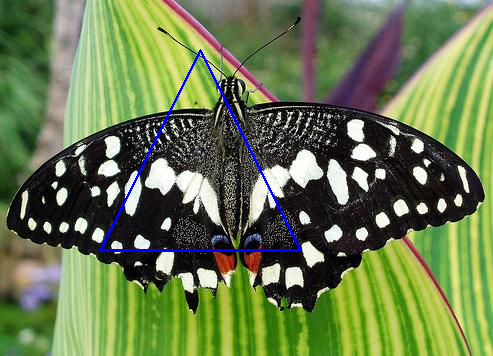

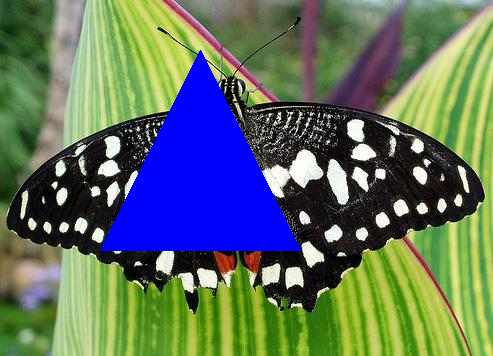

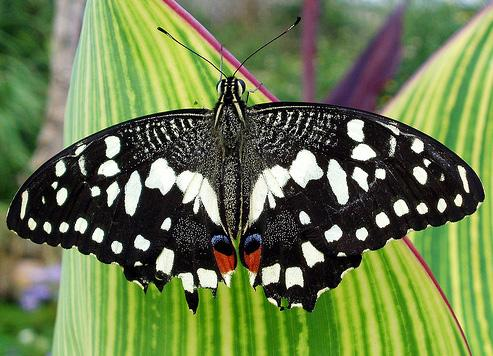

In [13]:
#read in the butterfly image
#open the chess_football image and display it in the notebook. Make sure to correct for the RGB order
#flip the image upside down and display it in the notebook.
#draw an empty RED rectangle around the butterfly and display the image in the notebook.
#draw a BLUE TRIANGLE in the middle of the image. The size and angle is up to you, but it should be a triangle (three sides) in any orientation.
#now fill in this triangle
#display the original image as well as the resultant image

qsn8_butterfly=cv2.imread('/butterfly.jpg',cv2.IMREAD_ANYCOLOR)
chess=cv2.imread("/chess_football.png")
chess_rgb = cv2.cvtColor(chess, cv2.COLOR_BGR2RGB)

cv2_imshow(np.hstack((chess,chess_rgb)))

flip=cv2.flip(chess,0)
cv2_imshow(flip)

rect_cop=qsn8_butterfly.copy()
cv2.rectangle(rect_cop,(10,50),(480,330),(255, 253, 208),2)
cv2_imshow(rect_cop)

butter_tri=qsn8_butterfly.copy()
triangle_pts = np.array([[100,250],[200,50],[300,250]])
cv2.polylines(butter_tri, [triangle_pts], isClosed=True, color=(255, 0, 0), thickness=2)
cv2_imshow(butter_tri)
filled=qsn8_butterfly.copy()
cv2.fillPoly(filled, [triangle_pts], (255, 0, 0))
cv2_imshow(filled)
cv2_imshow(qsn8_butterfly)

### Question 9

In [15]:
#create a script that opens the picture and allows you to draw empty red circles where ever you click the RIGHT MOUSE BUTTON DOWN

#Answer

import ipywidgets as widgets
from IPython.display import display
from io import BytesIO

# Function to handle mouse clicks
def handle_click(change):
    global img
    x, y = change['new']
    cv2.circle(img, (x, y), 10, (0, 0, 255), 2)
    img_bytes = cv2.imencode('.jpg', img)[1].tobytes()
    with out:
        clear_output(wait=True)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()

# Read the image (replace with your image path)
img = cv2.imread('/players.jpg')

# Create an output widget for displaying the image
out = widgets.Output()
with out:
    img_bytes = cv2.imencode('.jpg', img)[1].tobytes()
    display(widgets.Image(value=img_bytes, format='jpeg', width=img.shape[1], height=img.shape[0]))
out

# Create a button to clear the drawn circles
clear_button = widgets.Button(description="Clear Circles")
clear_button.on_click(lambda _: out.clear_output())

# Create a mouse event handler to draw circles
mouse_events = widgets.Image(value=img_bytes, format='jpeg', width=img.shape[1], height=img.shape[0])
mouse_events.observe(handle_click, names='data')

# Display the widgets
widgets.VBox([out, mouse_events, clear_button])

###Question 10

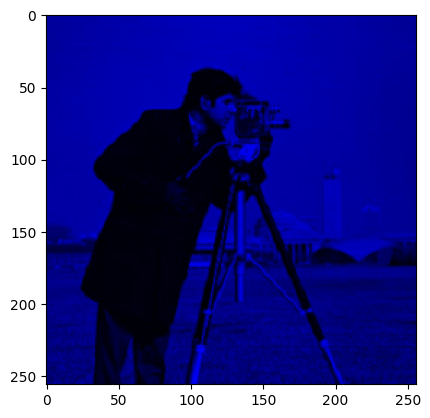

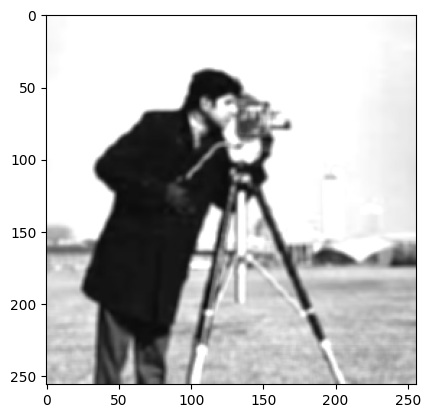

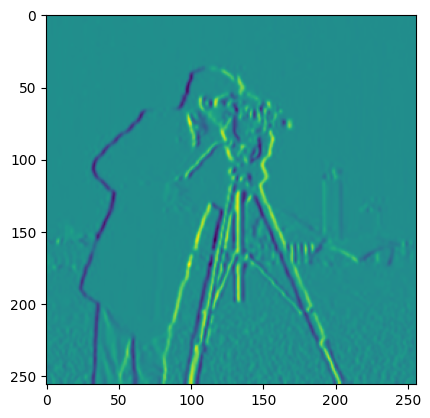

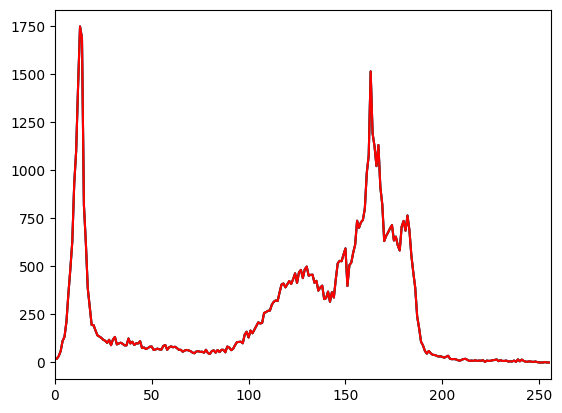

In [17]:
#open and display the any image of your choice
#apply a binary threshold onto the image
#convert image colorspace to HSV and display the image
#create a low pass filter with a 4 by 4 Kernel filled with values of 1/10 (0.01) and then use 2-D Convolution to blur the image (displayed in normal RGB)
#create a Horizontal Sobel Filter with a kernel size of 5 to the grayscale version of the image and then display the resulting gradient filtered version of the image.
#plot the color histograms for the RED, BLUE, and GREEN channel of the image. Pay careful attention to the ordering of the channels

img = cv2.imread('/cameraman.jpg')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.imshow(hsv)
plt.show()

kernel = np.ones((4, 4), np.float32) / 10
dst = cv2.filter2D(img, -1, kernel)
plt.imshow(dst)
plt.show()

sobel_kernel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=5)
plt.imshow(sobelx)
plt.show()

color = ('b', 'g', 'r')
for i, col in enumerate(color):
    histr = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(histr, color=col)
    plt.xlim([0, 256])
plt.show()